# Visualize the SBL prior model  

In [1]:
# Import module. 
using Revise
using PriorNormalization

In [2]:
# Import packages. 
using CairoMakie # for plots
using Distributions
using LaTeXStrings

## Parameters of the generalized gamma hyper-prior

In [3]:
# power parameters
r_range = [ 1.0, .5, -.5, -1.0 ]; 
# shape parameters 
β_range = [ 1.501, 3.0918, 2.0165, 1.0017 ]; 
# rate parameters 
ϑ_range = [ 5*10^(-2), 5.9323*10^(-3), 1.2583*10^(-3), 1.2308*10^(-4) ]; 

## Surface plot of the joint prior density

In [4]:
# Define the prior density 
function prior(x, θ; r, β, ϑ) 
    condPrior_distr = Normal( 0, sqrt(θ)) # distribution - conditional prior 
    hyperPrior_distr = GeneralizedGamma(r, β, ϑ) # distribution - hyper-prior
    condPrior_logPDF = logpdf( condPrior_distr, x ) # log-PDF - conditional prior
    hyperPrior_logPDF = logpdf( hyperPrior_distr, θ ) # log-PDF - hyper-prior 
    logPDF = condPrior_logPDF + hyperPrior_logPDF # log-PDF - joint prior 
    return exp( logPDF ) # return the PDF 
end

prior (generic function with 1 method)

### Convex prior model: $r=1$

In [5]:
# Generate a grid of values for x and y
i = 1 # convex prior model 
x_range = range( -.1, stop=.1, length=100 ) 
θ_range = range( 10^(-4), stop=10^(-2), length=100 ) 
 
# Evaluate the log-PDF or PDF at each grid point
prior_values = [prior(x, θ; r=r_range[i], β=β_range[i], ϑ=ϑ_range[i]) for x in x_range, θ in θ_range]

100×100 Matrix{Float64}:
 7.70198e-21  5.53856e-10  2.30052e-6   …  19.7727  19.8374  19.9003  19.9613
 5.68988e-20  1.50538e-9   4.48049e-6      20.1846  20.2464  20.3064  20.3645
 4.03533e-19  4.00899e-9   8.6083e-6       20.5963  20.6552  20.7122  20.7674
 2.74745e-18  1.04607e-8   1.63155e-5      21.0077  21.0635  21.1174  21.1696
 1.7958e-17   2.67439e-8   3.05054e-5      21.4182  21.4709  21.5217  21.5708
 1.12683e-16  6.69924e-8   5.62657e-5   …  21.8276  21.877   21.9247  21.9706
 6.78792e-16  1.64424e-7   0.000102377     22.2355  22.2816  22.326   22.3687
 3.92546e-15  3.95404e-7   0.000183761     22.6414  22.6842  22.7253  22.7647
 2.17931e-14  9.31655e-7   0.000325385     23.0451  23.0845  23.1222  23.1583
 1.16151e-13  2.15084e-6   0.000568371     23.4461  23.482   23.5163  23.549
 5.94297e-13  4.86516e-6   0.000979397  …  23.844   23.8764  23.9073  23.9366
 2.91917e-12  1.07826e-5   0.00166486      24.2385  24.2674  24.2948  24.3207
 1.37654e-11  2.34148e-5   0.00279182   

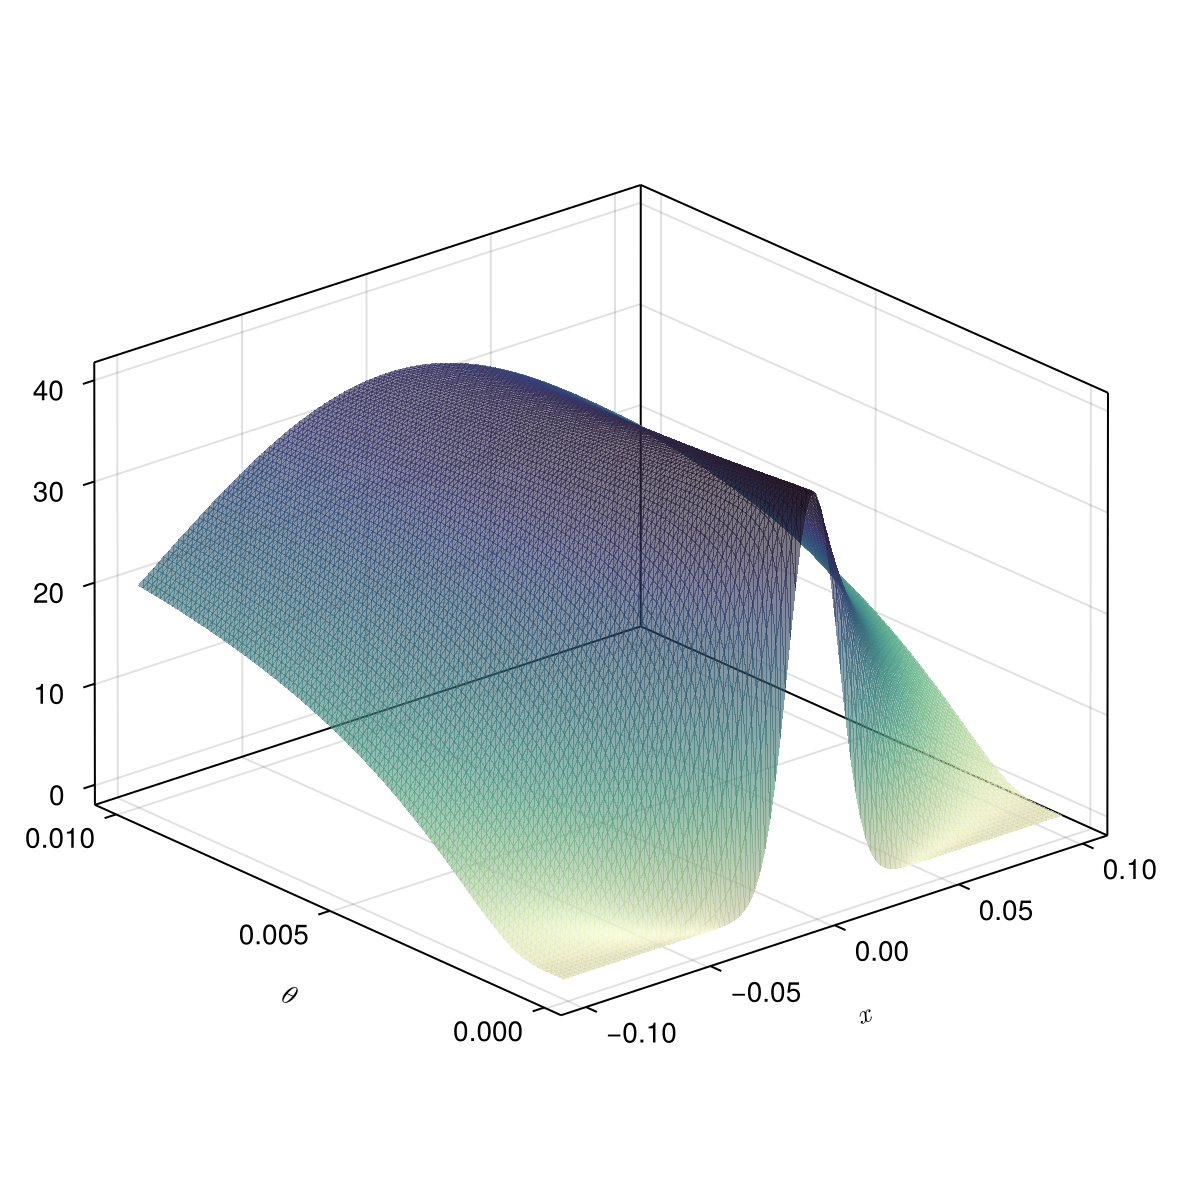

CairoMakie.Screen{IMAGE}


In [6]:
# Generate plot
fig1 = Figure(size = (600, 600))
ax1 = Axis3(fig1[1, 1], xlabel = L"x", ylabel = L"\theta", zlabel = "density")
CairoMakie.surface!(ax1, x_range, θ_range, prior_values, 
    colormap = :deep, alpha = 0.6)

# Display the figure
display(fig1)

### Convex prior model: $r=-1$

In [7]:
# Generate a grid of values for x and y
i = 4 # convex prior model 
x_range = range( -.1, stop=.1, length=100 ) 
θ_range = range( 10^(-4), stop=10^(-2), length=100 ) 
 
# Evaluate the log-PDF or PDF at each grid point
prior_values = [prior(x, θ; r=r_range[i], β=β_range[i], ϑ=ϑ_range[i]) for x in x_range, θ in θ_range]

100×100 Matrix{Float64}:
 2.76963e-17  6.51572e-7   0.00120682  …  3.10453  3.04223  2.98164  2.92269
 2.04608e-16  1.77098e-6   0.00235041     3.1692   3.10495  3.04248  2.98173
 1.4511e-15   4.71629e-6   0.00451581     3.23385  3.16764  3.10329  3.04072
 9.87984e-15  1.23063e-5   0.00855893     3.29844  3.23025  3.164    3.09961
 6.45768e-14  3.14622e-5   0.0160028      3.3629   3.29273  3.22457  3.15835
 4.05209e-13  7.88117e-5   0.0295164   …  3.42717  3.35502  3.28495  3.21689
 2.44094e-12  0.000193433  0.0537059      3.49121  3.41706  3.34508  3.27518
 1.4116e-11   0.000465164  0.0963991      3.55495  3.47881  3.4049   3.33316
 7.83681e-11  0.00109603   0.170693       3.61833  3.54019  3.46437  3.39079
 4.1768e-10   0.00253031   0.298161       3.68129  3.60115  3.52342  3.448
 2.13709e-9   0.00572352   0.51378     …  3.74377  3.66164  3.58201  3.50475
 1.04973e-8   0.012685     0.873365       3.80571  3.7216   3.64006  3.56098
 4.95005e-8   0.0275458    1.46456        3.86704  3.

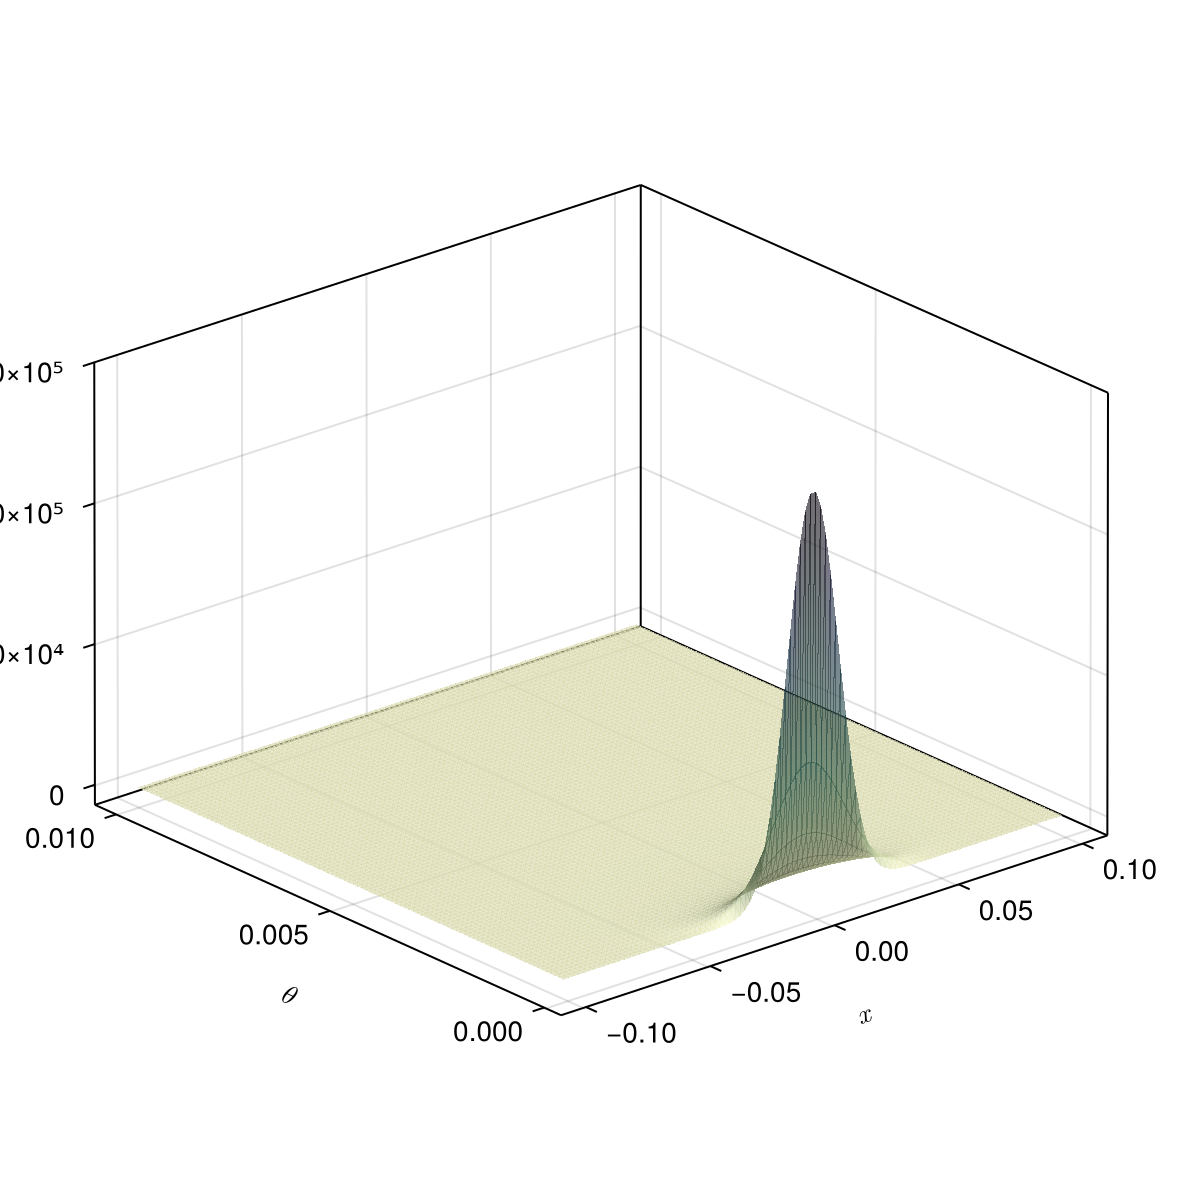

CairoMakie.Screen{IMAGE}


In [8]:
# Generate plot
fig2 = Figure(size = (600, 600))
ax2 = Axis3(fig2[1, 1], xlabel = L"x", ylabel = L"\theta", zlabel = "density")
CairoMakie.surface!(ax2, x_range, θ_range, prior_values, 
    colormap = :deep, alpha = 0.6)

# Display the figure
display(fig2)